In [ ]:
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as spo
from tqdm import tqdm
from scipy.stats import expon
from tabulate import tabulate
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/DataRotacion.csv'
filename = 'DataRotacion.csv'
urllib.request.urlretrieve(url, filename)
Data = pd.read_csv(url)

In [ ]:
datos = Data[Data['angle']== 30]
datos

,h,angle,y,sigmay
20,10.0,30.0,0.0013,0.0015
21,20.0,30.0,0.0017,0.0015
22,30.0,30.0,0.0038,0.0015
23,40.0,30.0,0.0059,0.0015
24,50.0,30.0,0.0067,0.0015
25,60.0,30.0,0.0094,0.0015
26,70.0,30.0,0.0122,0.0015
27,80.0,30.0,0.0132,0.0015
28,90.0,30.0,0.0151,0.0015
29,100.0,30.0,0.0186,0.0015


In [ ]:
h = np.float64(datos.h)
angle = np.float64(datos.angle)
y = np.float64(datos.y)
sigmay = np.float64(datos.sigmay)

In [ ]:
def model(h, λ, p, g = 9.81):
  return ((2*np.sqrt(2))/3)*p*np.cos(np.deg2rad(λ))*np.sqrt((h**3)/g)

In [ ]:
def x_2(p, h, y, sigmay, g = 9.81, λ = 30):
  return np.sum((y - (model(h,λ,p,g)))**2/(2*sigmay**2))

In [ ]:
p = 1
opt = lambda *p: x_2(*p)
result = spo.minimize(opt, p, args=(h,y,sigmay),options={'disp':True})
result.x

Optimization terminated successfully.
         Current function value: 1.145718
         Iterations: 3
         Function evaluations: 8
         Gradient evaluations: 4


array([7.24399804e-05])

Text(0, 0.5, 'y[m]')

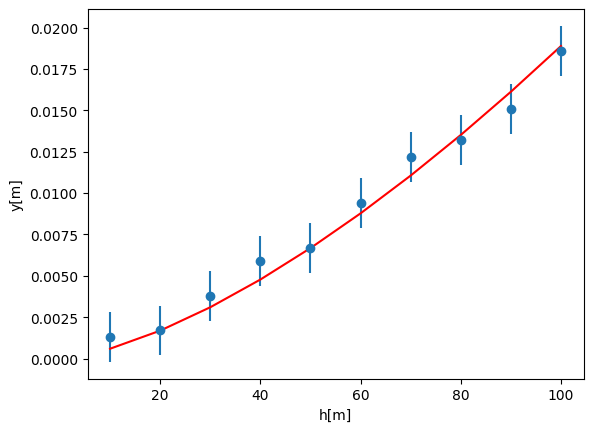

In [ ]:
w = result.x
λ = 30
y_m = model(h,λ,w) 

plt.errorbar(h,y,sigmay, fmt='o')
plt.plot(h,y_m, color = "r")
plt.xlabel('h[m]') 
plt.ylabel('y[m]')

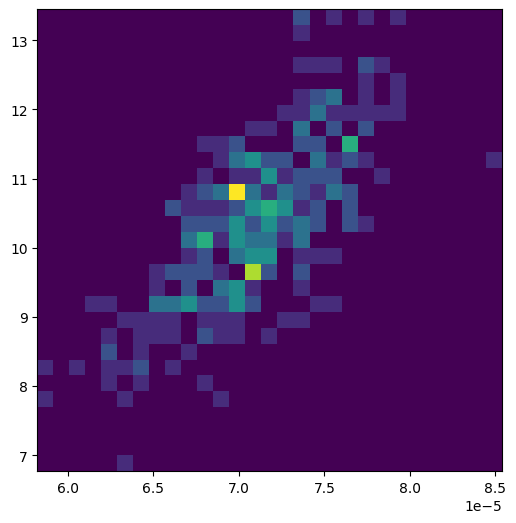

In [ ]:
N = 300
Gravedad = np.zeros(N)
Omega = np.zeros(N)

for i in range(N):
  g = 9.81 + np.random.normal(loc  = 0, scale = 1)
  Gravedad[i] = g
  y_modificado = np.abs(y + np.random.normal( loc = 0, scale = sigmay[0], size = len(y)))
  
  p = np.zeros(1)
  result = spo.minimize(opt, p, args = (h, y_modificado, sigmay, Gravedad[i], 30), options={'disp':False})
  Omega[i] = result.x


binsy = np.linspace(min(Gravedad),max(Gravedad),30)
binsx = np.linspace(min(Omega),max(Omega),30)
H2, binsx, binsy = np.histogram2d(Omega, Gravedad, bins=(binsx,binsy))

plt.figure(figsize = (6,6))
plt.imshow(H2, origin='lower', extent=[binsx[0], binsx[-1], binsy[0], binsy[-1]], aspect='auto')
plt.show()

<ipython-input-366-7978ea6fb152>:1: UserWarning: The following kwargs were not used by contour: 'aspect'
  plt.contourf(H2, origin='lower', extent=[binsx[0], binsx[-1], binsy[0], binsy[-1]], aspect='auto')


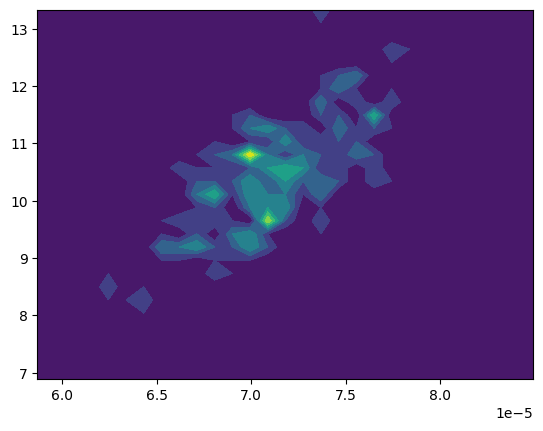

In [ ]:
plt.contourf(H2, origin='lower', extent=[binsx[0], binsx[-1], binsy[0], binsy[-1]], aspect='auto')

In [ ]:
H1 = np.sum(H2,axis=1)
H1

array([ 1.,  0.,  0.,  0.,  3.,  3.,  7.,  4.,  9.,  9., 24., 12., 19.,
       17., 23., 26., 25., 29., 15., 20., 13.,  9., 10.,  8.,  2.,  6.,
        0.,  1.,  5.])

In [ ]:
cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16))
ii = np.searchsorted( cs, np.percentile(cs,50))
ji = np.searchsorted( cs, np.percentile(cs,84))

In [ ]:
lambdas=[10,20,30,40,50,60]

def x_2_lambdas(p, h, y, sigmay, g, λ):
   return np.sum((y - (model(h,λ,p,g)))**2/(2*sigmay**2))

opt = lambda *p: x_2_lambdas(*p)

mejores_estimadores=[]
intervalos_confianza=[]
sds=[]

for l in lambdas:
  datos = Data[Data['angle']==l]
  h = np.float64(datos.h)
  angle = np.float64(datos.angle)
  y = np.float64(datos.y)
  sigmay = np.float64(datos.sigmay)

  y_modificado = np.abs(y + np.random.normal( loc = 0, scale = sigmay[0], size = len(y)))

  for i in range(N):
    p = np.zeros(1)
    result = spo.minimize(opt, p, args = (h, y_modificado, sigmay, Gravedad[i], l), options={'disp':False})
    Omega[i] = result.x 

  binsy = np.linspace(min(Gravedad),max(Gravedad),30)
  binsx = np.linspace(min(Omega),max(Omega),30)
  H2, binsx, binsy = np.histogram2d(Omega, Gravedad, bins=(binsx,binsy))

  H1 = np.sum(H2,axis=1)

  cs = np.cumsum(H1)
  ij = np.searchsorted( cs, np.percentile(cs,16))
  ii = np.searchsorted( cs, np.percentile(cs,50))
  ji = np.searchsorted( cs, np.percentile(cs,84))

  mejor_estimador=Omega[ii]
  intervalo_confianza=[Omega[ji]*10**5,Omega[ij]*10**5]
  sd=(np.std(sigmay))/Omega[ij]

  mejores_estimadores.append(mejor_estimador*10**5)
  intervalos_confianza.append(intervalo_confianza)
  sds.append(sd)

In [ ]:
datos = Data
h = np.float64(datos.h)
angle = np.float64(datos.angle)
y = np.float64(datos.y)
sigmay = np.float64(datos.sigmay)

y_modificado = np.abs(y + np.random.normal( loc = 0, scale = sigmay[0], size = len(y)))

for i in range(N):
    p = np.zeros(1)
    result = spo.minimize(opt, p, args = (h, y_modificado, sigmay, Gravedad[i],angle), options={'disp':False})
    Omega[i] = result.x 

binsy = np.linspace(min(Gravedad),max(Gravedad),30)
binsx = np.linspace(min(Omega),max(Omega),30)
H2, binsx, binsy = np.histogram2d(Omega, Gravedad, bins=(binsx,binsy))

H1 = np.sum(H2,axis=1)

cs = np.cumsum(H1)
ij = np.searchsorted( cs, np.percentile(cs,16))
ii = np.searchsorted( cs, np.percentile(cs,50))
ji = np.searchsorted( cs, np.percentile(cs,84))

mejor_estimador=Omega[ii]
intervalo_confianza=[Omega[ji]*10**5,Omega[ij]*10**5]
sd=np.std(sigmay)/Omega[ij]

mejores_estimadores.append(mejor_estimador*10**5)
intervalos_confianza.append(intervalo_confianza)
sds.append(sd)
lambdas.append("Combined")

In [ ]:
d = {'l': lambdas, 'w': mejores_estimadores, 'IC':intervalos_confianza, 'o': sds}
df2 = pd.DataFrame(d).set_index('l')
df2

,w,IC,o
l,,,
10,6.741844,"[6.860006510023474, 6.881049047691177]",0.0
20,7.144141,"[7.269353282522718, 7.291651351442124]",0.0
30,6.752101,"[6.870443069934355, 6.8915176766594755]",0.0
40,7.408118,"[7.537956931481135, 7.5610787808833475]",0.0
50,5.860802,"[5.963523899641153, 5.981816812988123]",0.0
60,7.358921,"[7.487897777198806, 7.510866097945217]",0.0
Combined,6.870332,"[6.99074650791682, 7.012190016464985]",0.0


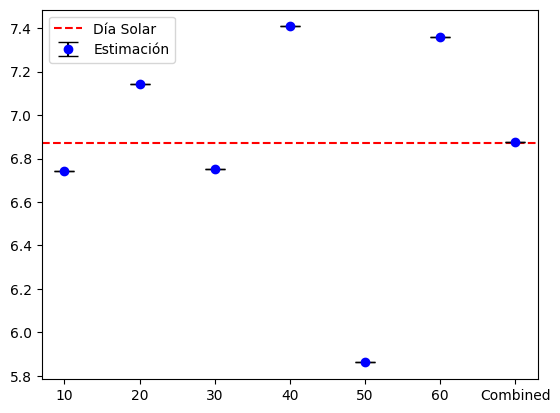

[[6.860006510023474, 6.881049047691177], [7.269353282522718, 7.291651351442124], [6.870443069934355, 6.8915176766594755], [7.537956931481135, 7.5610787808833475], [5.963523899641153, 5.981816812988123], [7.487897777198806, 7.510866097945217], [6.99074650791682, 7.012190016464985]]


In [ ]:
la = [10,20,30,40,50,60]

plt.axhline(mejores_estimadores[-1], linestyle = 'dashed', color = 'r', label="Día Solar")

for i in range(len(la)):
  ax = plt.errorbar(la[i], mejores_estimadores[i], linestyle="None", yerr = sds[i], fmt="ob", capsize=7, ecolor="k")
plt.errorbar(70, np.sum(mejores_estimadores)/len(mejores_estimadores), linestyle="None", yerr = np.sum(sds)/len(sds), fmt="ob", capsize=7, ecolor="k", label = "Estimación")
plt.xticks(la + [70],["10", "20", "30", "40", "50", "60", "Combined"])
plt.legend()
plt.show()
print(intervalos_confianza)

In [ ]:
la = [10,20,30,40,50,60]

plt.axhline(mejores_estimadores[-1], linestyle = 'dashed', color = 'r', label="Día Solar")

for i in range(len(la)):
  ax = plt.errorbar(la[i], mejores_estimadores[i], linestyle="None", yerr = sds[i], fmt="ob", capsize=7, ecolor="k")
plt.errorbar(70, np.sum(mejores_estimadores)/len(mejores_estimadores), linestyle="None", yerr = np.sum(sds)/len(sds), fmt="ob", capsize=7, ecolor="k", label = "Estimación")
plt.xticks(la + [70],["10", "20", "30", "40", "50", "60", "Combined"])
plt.legend()
plt.show()
print(intervalos_confianza)